# Homework
## Imports


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step one
- reads the dataset 'umsatzdaten_gekuerzt.csv' and
- uses a bar chart to show the relationship of average sales per weekday

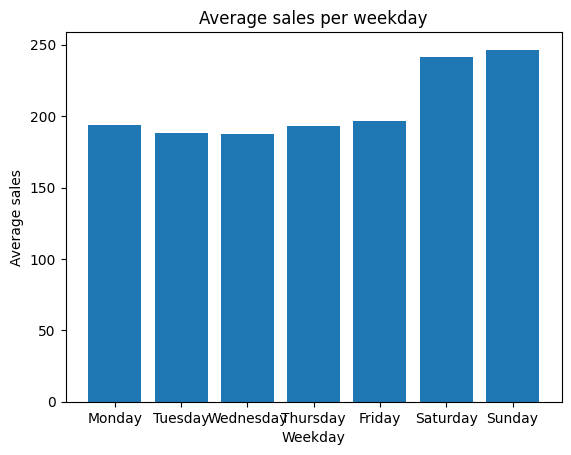

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

umsatzdaten_gekuerzt = pd.read_csv('umsatzdaten_gekuerzt.csv')

# getting weekday
umsatzdaten_gekuerzt['Datum'] = pd.to_datetime(umsatzdaten_gekuerzt['Datum'])
umsatzdaten_gekuerzt['weekday'] = umsatzdaten_gekuerzt['Datum'].dt.day_name()

# getting average sales per weekday
avg_mon = umsatzdaten_gekuerzt[umsatzdaten_gekuerzt['weekday'] == "Monday"]['Umsatz'].mean()
avg_tue = umsatzdaten_gekuerzt[umsatzdaten_gekuerzt['weekday'] == "Tuesday"]['Umsatz'].mean()
avg_wed = umsatzdaten_gekuerzt[umsatzdaten_gekuerzt['weekday'] == "Wednesday"]['Umsatz'].mean()
avg_thur = umsatzdaten_gekuerzt[umsatzdaten_gekuerzt['weekday'] == "Thursday"]['Umsatz'].mean()
avg_fri = umsatzdaten_gekuerzt[umsatzdaten_gekuerzt['weekday'] == "Friday"]['Umsatz'].mean()
avg_sat = umsatzdaten_gekuerzt[umsatzdaten_gekuerzt['weekday'] == "Saturday"]['Umsatz'].mean()
avg_sun = umsatzdaten_gekuerzt[umsatzdaten_gekuerzt['weekday'] == "Sunday"]['Umsatz'].mean()

# create the bar chart
x = np.array(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
y = np.array([avg_mon, avg_tue, avg_wed, avg_thur, avg_fri, avg_sat, avg_sun])
plt.bar(x, y)
plt.title("Average sales per weekday")
plt.xlabel("Weekday")
plt.ylabel("Average sales")
plt.show()

## step 2 and 3
- in a second step, add confidence intervals for the sales per weekday.
- in a further step, sort the weekdays from Monday to Sunday.

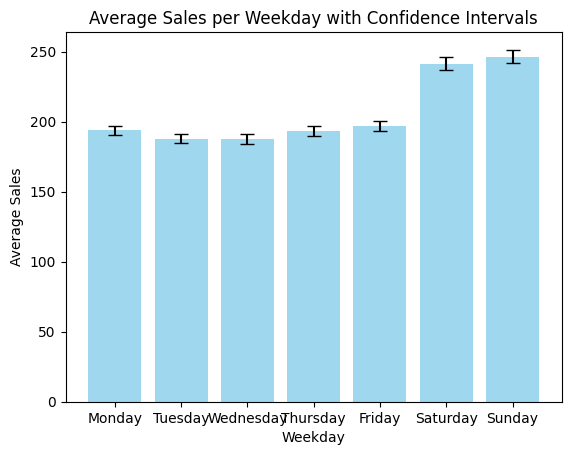

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem  


umsatzdaten_gekuerzt = pd.read_csv('umsatzdaten_gekuerzt.csv')


umsatzdaten_gekuerzt['Datum'] = pd.to_datetime(umsatzdaten_gekuerzt['Datum'])
umsatzdaten_gekuerzt['weekday'] = umsatzdaten_gekuerzt['Datum'].dt.day_name()


avg_sales = umsatzdaten_gekuerzt.groupby('weekday')['Umsatz'].mean()
sem_sales = umsatzdaten_gekuerzt.groupby('weekday')['Umsatz'].apply(sem) 

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
avg_sales = avg_sales.reindex(order)
sem_sales = sem_sales.reindex(order)


plt.bar(avg_sales.index, avg_sales, yerr=sem_sales, capsize=5, color='skyblue', alpha=0.8)
plt.title("Average Sales per Weekday with Confidence Intervals")
plt.xlabel("Weekday")
plt.ylabel("Average Sales")
plt.show()